In [1]:
from google.colab import drive
drive.mount('/content/drive')
import os
path="/content/drive/MyDrive/ASS/FLAMED"
os.chdir(path)
from newLibrary import *
from sklearn.metrics import confusion_matrix

Mounted at /content/drive


## Load the model and test it

In [2]:
load_models = torch.load('./model/new2')

model1 = load_models['model_1']
model2 = load_models['model_2']

In [3]:
pre,Finalpre,flamesta,scores = Test(4,model1,model2)
diffs = np.zeros_like(pre)
diffs = abs(scores[:,0]-scores[:,1])
confidence = diffs/np.max(diffs)

  0%|          | 0/44768 [00:00<?, ?it/s]d:\app\ANACONDA\envs\OD\lib\site-packages\librosa\util\decorators.py:88: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  return f(*args, **kwargs)
100%|██████████| 44768/44768 [04:26<00:00, 167.69it/s]


In [7]:
scores.shape

(44768, 2)

## Save the result in csv. format

In [11]:
dataframe_result = pd.DataFrame({'Prediction':pre, 'Prediction after filter':Finalpre, 
                                'Flame status':flamesta, 'confidence':confidence})
                                
dataframe_result.to_csv("Result.csv",index=False,sep=',')
print(dataframe_result.sample(n=5))

       Prediction  Prediction after filter  Flame status  confidence
37742         1.0                        1             1    0.025762
22317         0.0                        0             0    0.418140
38346         1.0                        1             1    0.024506
30473         0.0                        0             0    0.019095
13002         0.0                        0             0    0.016841


## Make some plots

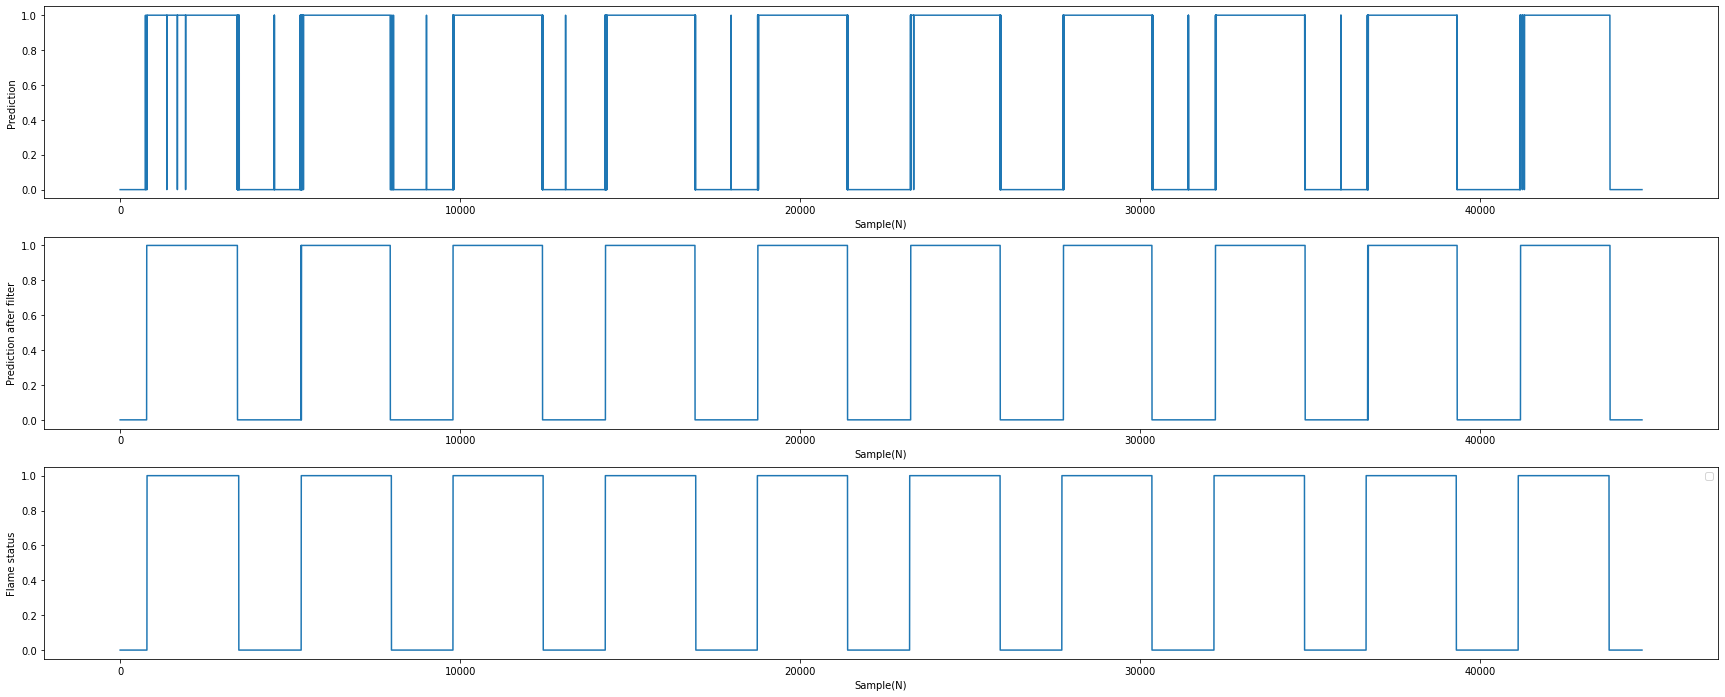

In [7]:
fig, ax = plt.subplots(3,1,figsize=(30, 12)) 
a,b = 0,995500

ax0 = ax[0]             
ax0.plot(pre[a:b])
ax0.set_xlabel('Sample(N)')
ax0.set_ylabel('Prediction')

ax1 = ax[1]             
ax1.plot(Finalpre[a:b])
ax1.set_xlabel('Sample(N)')
ax1.set_ylabel('Prediction after filter')

ax2 = ax[2]             
ax2.plot(flamesta[a:b])
ax2.set_xlabel('Sample(N)')
ax2.set_ylabel('Flame status')
ax2.legend()

#plt.savefig('./figure/'+'new9prediction'+".png",dpi=600,bbox_inches='tight')

plt.show()

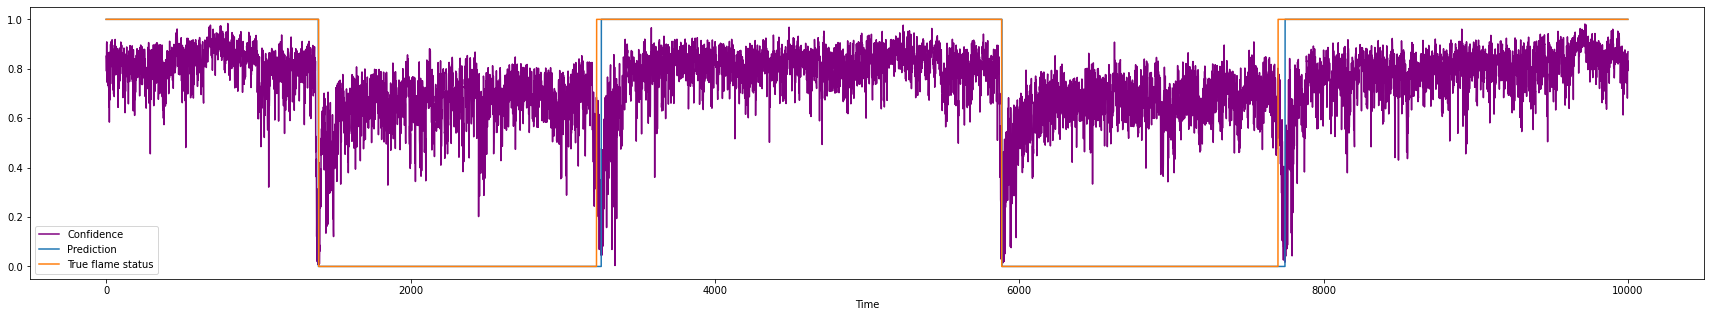

In [ ]:
plt.figure(figsize=(30,5))
a, b = 20000,30000
plt.plot(np.linspace(0,b-a,b-a),(diffs/np.max(diffs))[a:b][::1],color = 'purple',label='Confidence')
plt.plot(Finalpre[a:b],label='Prediction')
plt.plot(flamesta[a:b],label='True flame status')
plt.xlabel('Time')
plt.legend()
#plt.savefig('confidence')

## Compute confusion matrix

In [4]:
confusion_matrix(Finalpre, flamesta)

array([[18087,   419],
       [   57, 26205]], dtype=int64)